In [400]:
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import pickle
import matplotlib
import ipyparams

path = os.getcwd().split(os.sep + 'GUI')[0]
if path not in sys.path:
    print("not here")
    sys.path.append(path)

from neurolib.models.aln import ALNModel
from neurolib.utils import plotFunctions as plotFunc
from neurolib.utils import func_optimize as fo
from neurolib.utils import costFunctions as cost
import neurolib.dashboard.functions as functions
import neurolib.dashboard.data as data
import neurolib.dashboard.layout as layout
    
# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2 

#path = os.path.join(os.getcwd(), "plots")

cmap_ = layout.getcolormap()
darkgrey, midgrey, lightgrey, color_bi_updown, color_LC, color_bi_uposc = layout.getcolors_rgba()
exc_red = cmap_(3)
inh_blue=cmap_(0)
green = cmap_(2)
orange = cmap_(1)
purple = cmap_(4)
brown = cmap_(5)
pink = cmap_(6)
grey = cmap_(7)
lightgreen = cmap_(8)
lightblue = cmap_(9)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [137]:
aln = ALNModel()
N = aln.params.N

data.set_parameters(aln)

state_vars = aln.state_vars
init_vars = aln.init_vars

##############################################################
def setinit(init_vars_, model):
    state_vars = model.state_vars
    init_vars = model.init_vars
    for iv in range(len(init_vars)):
        for sv in range(len(state_vars)):
            if state_vars[sv] in init_vars[iv]:
                #print("set init vars ", )
                if model.params[init_vars[iv]].ndim == 2:
                    model.params[init_vars[iv]][0,:] = init_vars_[sv]
                else:
                    model.params[init_vars[iv]][0] = init_vars_[sv]
                    
def setmaxmincontrol(max_c_c, min_c_c, max_c_r, min_c_r):
    import numpy as np
    
    max_cntrl = np.zeros(( 6 ))
    min_cntrl = np.zeros(( 6 ))
    
    max_cntrl[0] = max_c_c
    min_cntrl[0] = min_c_c
    max_cntrl[1] = max_c_c
    min_cntrl[1] = min_c_c
    max_cntrl[2] = max_c_r
    min_cntrl[2] = min_c_r
    max_cntrl[3] = max_c_r
    min_cntrl[3] = min_c_r
    max_cntrl[4] = max_c_r
    min_cntrl[4] = min_c_r
    max_cntrl[5] = max_c_r
    min_cntrl[5] = min_c_r
            
    return max_cntrl, min_cntrl

In [15]:
points_0 = np.array( [ [0.4, 0.35], [0.4, 0.4], [0.45, 0.4], [0.425, 0.45], [0.475, 0.45], [0.45, 0.5],
                    [0.5, 0.5], [0.45, 0.65], [0.5, 0.65], [0.55, 0.65] ])

point_1 = np.array( [ [0.4, 0.322] ])

In [16]:
params_list = ['task', 'point', 'cost_params', 'init', 'init_vars', 'target', 'sigma', 'N_array', 'cost']

In [242]:
dur_DU = 200.
dur_OU = 500.
dur_pre = 10
dur_post=10
trans_time = 0.8
dt = 0.1
prec_vars = [0,1]

c_m1 = 'red'
c_m2 = 'green'
c_m3 = 'blue'
c_m4 = 'orange'

In [499]:
dict_file = "OU_1E.pickle"
file = open(dict_file, "rb")
dict_OU1E = pickle.load(file)
file.close()

dict_file = "OU_1I.pickle"
file = open(dict_file, "rb")
dict_OU1I = pickle.load(file)
file.close()

for d_ind in range(len(dict_OU1E)):
    d_OU1E = dict_OU1E[d_ind]
    d_OU1I = dict_OU1I[d_ind]
    
    for s_ind in range(len(d_OU1E['sigma'])):
        print("sigma : ", s_ind)
        mincostind = ['', -1, -1, -1]
        mincost = 1000.
        
        for m_ind in range(4):

            for n_ind in range(1, d_OU1E['cost'].shape[3], 1):

                for i_ind in range(1, d_OU1E['cost'].shape[4], 1):

                    if ( d_OU1E['cost'][s_ind, m_ind, 0, n_ind, i_ind] < mincost
                        and d_OU1E['cost'][s_ind, m_ind, 0, n_ind, i_ind] > 0.):
                        mincost = d_OU1E['cost'][s_ind, m_ind, 0, n_ind, i_ind]
                        mincostind = ['E', m_ind, n_ind, i_ind]
                    if ( d_OU1I['cost'][s_ind, m_ind, 0, n_ind, i_ind] < mincost
                        and d_OU1I['cost'][s_ind, m_ind, 0, n_ind, i_ind] > 0.):
                        mincost = d_OU1I['cost'][s_ind, m_ind, 0, n_ind, i_ind]
                        mincostind = ['I', m_ind, n_ind, i_ind]

        print("Method , min cost ", mincost, mincostind)

sigma :  0
Method , min cost  1.1168286194505308 ['I', 2, 2, 9]
sigma :  1
Method , min cost  2.1723688114239392 ['E', 1, 2, 19]
sigma :  2
Method , min cost  3.1011006539188344 ['I', 1, 3, 8]


In [495]:
noisefree_file = ".." + os.sep + 'data_2' + os.sep + 'high_osc' + os.sep + "1_I.pickle"
file = open(noisefree_file, "rb")
noisefree = pickle.load(file)
file.close()

noisefree_c = noisefree[0]
noisefree_cost = noisefree[2]

print( noisefree_c.shape )
print(noisefree_cost[0])

aln = ALNModel()
N = aln.params.N
data.set_parameters(aln)
state_vars = aln.state_vars
init_vars = aln.init_vars

T = int(dur_OU / dt)

d_OU1E = dict_OU1E[0]

aln.params.ext_exc_current = d_OU1E['point'][0] * 5.
aln.params.ext_inh_current = d_OU1E['point'][1] * 5.
noise_realizations_final = 10000

aln.params.duration = dur_OU
setinit(d['init_vars'], aln)

factor = np.zeros(( len(d_OU1E['sigma']) ))
cost_noisefree = np.zeros(( len(d_OU1E['sigma']) ))

(1, 6, 5201)
8.209671207899257


In [497]:
factor = [1.8, 2.8, 2.9]
cost_noisefree = [64.88213161, 63.28490779, 28.13466296]


In [277]:
for i_sig in range(len(d_OU1E['sigma'])):
        
    f_ = np.arange(0.5, 3., .1)
    c_ = np.zeros(( len(f_) ))
    aln.params.sigma_ou = d_OU1E['sigma'][i_sig]
    target_ = d_OU1E['target'][i_sig].copy()
    
    for t in range(target_.shape[2]):
        if t < T*trans_time:
            target_[:,:,t] = -1000.
            
    minind = -1
    minc = 1000.
    
    for f_ind in range(len(f_)):
        
        if c_[f_ind] != 0.:
            continue
        
        print(f_ind)
        
        control_init = aln.getZeroControl()
        control_init = f_[f_ind] * noisefree_c[:,:,100:-100]
        cost_final = 0.
        
        c_s = cost.numba_cost_sparsity_int(1, 6, T, d_OU1E['cost_params'][i_sig][2],
                                                           dt, control_init)
        
        for j in range(noise_realizations_final):
            state_ = fo.updateState(aln, control_init)
            #plt.plot(aln.t, aln.rates_exc[0,:])
            #plt.plot(aln.t, aln.rates_inh[0,:])
            cost_final += cost.numba_cost_precision_int(1, T, dt, d_OU1E['cost_params'][i_sig][0],
                                                           state_, target_, list([0,1]) )
            
        #plt.show()

        c_[f_ind] = cost_final/noise_realizations_final + c_s

        if c_[f_ind] < minc:
            minc = c_[f_ind]
            minind = f_ind
            
    factor[i_sig] = f_[minind]
    cost_noisefree[i_sig] = minc
        
print(factor)
print(cost_noisefree)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
[1.8 2.8 2.9]
[64.88213161 63.28490779 28.13466296]


In [440]:
aln.params.ext_exc_current = d_OU1E['point'][0] * 5.
aln.params.ext_inh_current = d_OU1E['point'][1] * 5.
noise_realizations_final = 10000

aln.params.duration = dur_OU
setinit(d['init_vars'], aln)

cost_uncontrolled = np.zeros(( len(d_OU1E['sigma']) ))

for i_sig in range(len(d_OU1E['sigma'])):

    aln.params.sigma_ou = d_OU1E['sigma'][i_sig]
    target_ = d_OU1E['target'][i_sig]
    
    for t in range(target_.shape[2]):
        if t < T*trans_time:
            target_[:,:,t] = -1000.

    control_init = aln.getZeroControl()
    cost_final = 0.

    for j in range(noise_realizations_final):
        state_ = fo.updateState(aln, control_init)
        cost_final += cost.numba_cost_precision_int(1, T, dt, d_OU1E['cost_params'][i_sig][0],
                                                       state_, target_, list([0,1]) )


    cost_uncontrolled[i_sig] = cost_final/noise_realizations_final

[64.88213161, 63.28490779, 28.13466296]


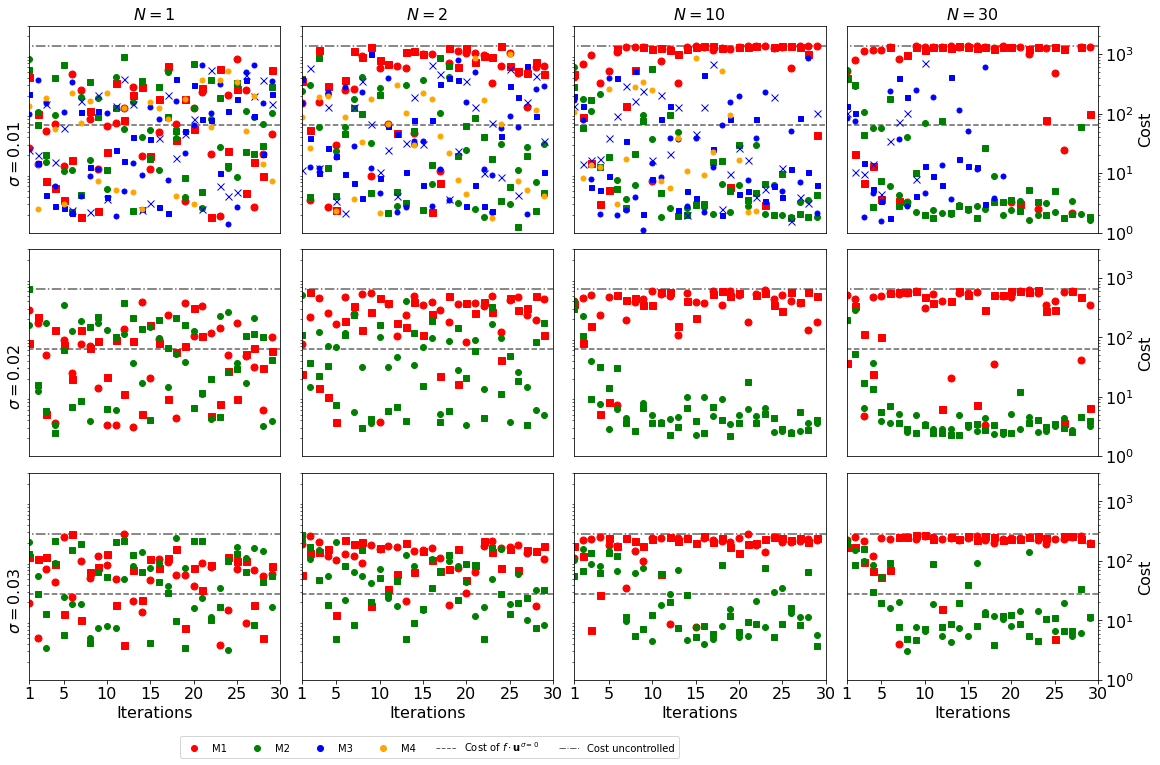

In [500]:
point = 0
print(cost_noisefree)

d = dict_OU1E[point]
dI = dict_OU1I[point]

rows = len(d['sigma'])
columns = len(d['N_array'])
fs_ = 16
ms_ = 6
x_array = np.arange(1, p['cost'].shape[4])
x_tick_array = [1,5,10,15,20,25,30]

fig, ax = plt.subplots( rows,columns, figsize=(16,10), constrained_layout=True)
for s_ind in range(rows):
    for n_ind in range(columns):
        n_ = d['N_array'][n_ind]
        ax[s_ind,n_ind].plot(x_array, d['cost'][s_ind, 0, 0, n_ind, 1:],
                             color=c_m1, linestyle='', marker='s', markersize=ms_+1)
        ax[s_ind,n_ind].plot(x_array, dI['cost'][s_ind, 0, 0, n_ind, 1:],
                             color=c_m1, linestyle='', marker='o', markersize=ms_+1)
        
        ax[s_ind,n_ind].plot(x_array, d['cost'][s_ind, 1, 0, n_ind, 1:],
                             color=c_m2, linestyle='', marker='s', markersize=ms_)
        ax[s_ind,n_ind].plot(x_array, dI['cost'][s_ind, 1, 0, n_ind, 1:],
                             color=c_m2, linestyle='', marker='o', markersize=ms_)
        
        ax[s_ind,n_ind].plot(x_array, d['cost'][s_ind, 2, 0, n_ind, 1:],
                             color=c_m3, linestyle='', marker='s', markersize=ms_-1)
        ax[s_ind,n_ind].plot(x_array, dI['cost'][s_ind, 2, 0, n_ind, 1:],
                             color=c_m3, linestyle='', marker='o', markersize=ms_-1)
        ax[s_ind,n_ind].plot(x_array, d['cost'][s_ind, 2, 1, n_ind, 1:],
                             color=c_m3, linestyle='', marker='x', markersize=ms_+1)
        ax[s_ind,n_ind].plot(x_array, dI['cost'][s_ind, 2, 1, n_ind, 1:],
                             color=c_m3, linestyle='', marker='+', markersize=ms_+1)
        
        ax[s_ind,n_ind].plot(x_array, d['cost'][s_ind, 3, 0, n_ind, 1:],
                             color=c_m4, linestyle='', marker='s', markersize=ms_-1)
        ax[s_ind,n_ind].plot(x_array, dI['cost'][s_ind, 3, 0, n_ind, 1:],
                             color=c_m4, linestyle='', marker='o', markersize=ms_-1)
        ax[s_ind,n_ind].plot(x_array, d['cost'][s_ind, 3, 1, n_ind, 1:],
                             color=c_m4, linestyle='', marker='x', markersize=ms_)
        ax[s_ind,n_ind].plot(x_array, dI['cost'][s_ind, 3, 1, n_ind, 1:],
                             color=c_m4, linestyle='', marker='+', markersize=ms_)
        
        ax[s_ind,n_ind].hlines(cost_noisefree[s_ind], 0, 30, color=darkgrey, linestyle='--')
        ax[s_ind,n_ind].hlines(cost_uncontrolled[s_ind], 0, 30, color=darkgrey, linestyle='dashdot')
        
for r in range(rows):
    for c in range(columns):
        ax[r,c].set_ylim(1,3000)
        ax[r,c].set_xlim(1,30)
        ax[r,c].tick_params(axis='x', labelsize=fs_)
        ax[r,c].tick_params(axis='y', labelsize=fs_)
        
        ax[r,c].set_xticks([])
        ax[r,c].grid(False)
        ax[r,c].set_yscale('log')
        ax[r,c].set_yticks([])
        
for r in range(rows):
    ax[r,-1].set_yticks([1,10,100,1000])
    ax[r,-1].set_ylabel('Cost', fontsize=fs_)
    ax[r,-1].yaxis.set_label_position("right")
    ax[r,-1].yaxis.tick_right()
    ax[r,0].text(-1.5,6., r'$\sigma=$'+'{:.2f}'.format(d['sigma'][r]), rotation=90, size=fs_,
                 verticalalignment='bottom')
    

for c in range(columns):
    ax[-1,c].set_xticks(x_tick_array)
    ax[-1,c].set_xlabel('Iterations', fontsize=fs_)
    ax[0,c].set_title(r'$N=$'+'{}'.format(d['N_array'][c]), fontsize=fs_)
        
legend_elements = [matplotlib.lines.Line2D([0], [0], marker='o', color=c_m1, label='M1', markersize=ms_, lw=0),
                  matplotlib.lines.Line2D([0], [0], marker='o', color=c_m2, label='M2', markersize=ms_, lw=0),
                  matplotlib.lines.Line2D([0], [0], marker='o', color=c_m3, label='M3', markersize=ms_, lw=0),
                  matplotlib.lines.Line2D([0], [0], marker='o', color=c_m4, label='M4', markersize=ms_, lw=0),
                  matplotlib.lines.Line2D([0], [0], marker=None, color=darkgrey,
                            label=r'Cost of $f\cdot \mathbf{u}^{\sigma=0}$', lw=1, linestyle='--'),
                  matplotlib.lines.Line2D([0], [0], marker=None, color=darkgrey, label='Cost uncontrolled',
                            lw=1, linestyle='dashdot')]
fig.legend(handles=legend_elements, ncol=6, bbox_to_anchor=(0.59, -0.01))

filename_ = 'OU1_point' + str(point) + '.png'   
savepath_writing = (os.getcwd().split('neurolib')[0] + 'writing' + os.sep + 'paper2_chaos' + os.sep + 'chaos'
                    + os.sep + 'images')
fig.savefig(os.path.join(savepath_writing, filename_), bbox_inches='tight')

plt.show()

In [482]:
# COMPUTE CONTROL
point = 0

d = dict_OU1E[point]
dI = dict_OU1I[point]

i_n = 3
i_it = 12
s_ind = 0

aln = ALNModel()
N = aln.params.N
data.set_parameters(aln)
state_vars = aln.state_vars
init_vars = aln.init_vars

aln.params.ext_exc_current = d['point'][0] * 5.
aln.params.ext_inh_current = d['point'][1] * 5.
aln.params.sigma_ou = d['sigma'][s_ind]

tol = 1e-16
start_step = 10.
c_scheme = np.zeros(( 1,1 ))
c_scheme[0,0] = 1.
u_mat = np.identity(1)
u_scheme = np.array([[1.]])
maxC = [5., -5., 0.18, 0.]
max_cntrl, min_cntrl = setmaxmincontrol(maxC[0], maxC[1], maxC[2], maxC[3])

aln.params.duration = dur_OU
control_init = aln.getZeroControl()
cost.setParams(d['cost_params'][0][0], d['cost_params'][0][1], d['cost_params'][0][2])
control_OU0 = []
cost_OU0 = []

target_ = d_OU1E['target'][s_ind].copy()
    
for t in range(target_.shape[2]):
    if t < T*trans_time:
        target_[:,:,t] = -1000.
        
nreal = 20 #d['N_array'][i_n]
it = 20

for j in range(3):

    aln.params.duration = dur_OU
    setinit(d['init_vars'], aln)

    bc, bs, c_, runtime, grad, phi, costnode, total_cost_mean_std = aln.A1(
        control_init, d['target'][s_ind], c_scheme, u_mat, u_scheme, max_iteration_ = it,
        tolerance_ = tol, startStep_ = start_step, max_control_ = max_cntrl, min_control_ = min_cntrl,
        t_sim_ = dur_OU, t_sim_pre_ = dur_pre, t_sim_post_ = dur_post, CGVar = None,
        control_variables_ = [0,1], prec_variables_ = prec_vars, transition_time_ = trans_time,
        noise_real=nreal, init_params = d['init_vars'], method='M3')

    control_OU0.append(bc[:,:,100:-100])
    
    cost_final = 0.    
    c_s = cost.numba_cost_sparsity_int(1, 6, T, d_OU1E['cost_params'][i_sig][2],
                                                           dt, control_OU0[-1])
        
    aln.params.duration = dur_OU
    setinit(d['init_vars'], aln)
    
    for j in range(noise_realizations_final):
        state_ = fo.updateState(aln, control_OU0[-1])
        cost_final += cost.numba_cost_precision_int(1, T, dt, d_OU1E['cost_params'][i_sig][0],
                                                       state_, target_, list([0,1]) )

    cost_OU0.append(cost_final/noise_realizations_final + c_s)
    print(cost_OU0)

set cost params:  0.00829916864127671 0.0 1.0
interpolate adjoint :  True True True
RUN  0 , total integrated cost =  1378.187045695642
Gradient descend method:  None
RUN  1 , total integrated cost =  113.06865728614505
RUN  2 , total integrated cost =  192.7057577985183
RUN  3 , total integrated cost =  36.960661533838014
step size too small or too large
RUN  4 , total integrated cost =  106.5599670160494
RUN  5 , total integrated cost =  21.485708401826134
RUN  6 , total integrated cost =  11.897206136532217
RUN  7 , total integrated cost =  11.390963714099613
RUN  8 , total integrated cost =  11.113236562938692
step size too small or too large
RUN  9 , total integrated cost =  10.896051008560018
RUN  10 , total integrated cost =  10.490455367559216
RUN  11 , total integrated cost =  10.245704190441094
RUN  12 , total integrated cost =  9.889642269818706
RUN  13 , total integrated cost =  9.59172582897813
RUN  14 , total integrated cost =  9.387869233179142
RUN  15 , total integrated

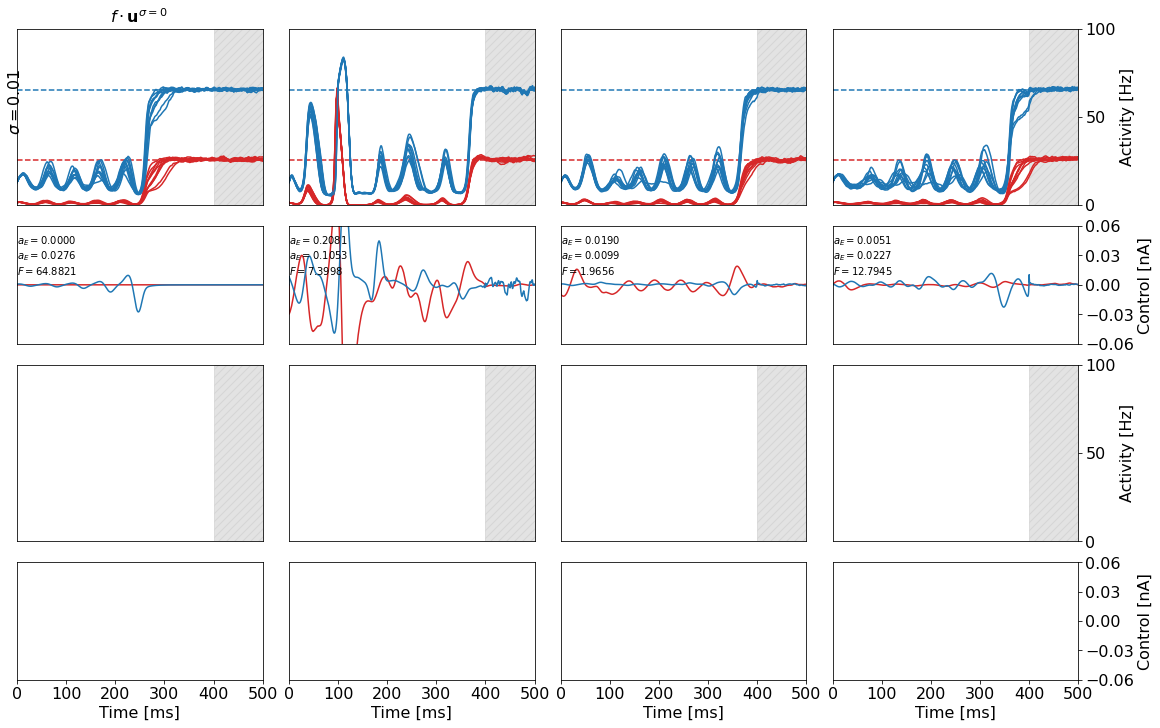

In [483]:
rows = 4
columns = 4

fig, ax = plt.subplots(rows, columns, figsize=(16,10), constrained_layout=True,
                       gridspec_kw={'height_ratios': [3,2,3,2]})
plot_realizations = 10

s_ind = 0

t_array = np.arange(0,dur_OU+dt,dt)
ax[0,0].set_title(r'$f\cdot \mathbf{u}^{\sigma=0}$ ', fontsize=fs_)

setinit(d['init_vars'], aln)
aln.params.duration = dur_OU
target_ = d['target'][s_ind].copy()
aln.params.sigma_ou = d['sigma'][s_ind]

for c in range(1,columns,1):

    ax[1,c].plot( t_array, control_OU0[c-1][0,0,:]/5., color=exc_red)
    ax[1,c].plot( t_array, control_OU0[c-1][0,1,:]/5., color=inh_blue)
    ax[1,c].text( 0.01, 0.01, r'$a_E=$' + '{:.4f}'.format(np.amax(np.abs(control_OU0[c-1][0,0,:]))/5.) +'\n'
                 + r'$a_E=$' + '{:.4f}'.format(np.amax(np.abs(control_OU0[c-1][0,1,:]))/5.) +'\n'
                 + r'$F=$' + '{:.4f}'.format(cost_OU0[c-1]) )

ax[1,0].plot( t_array, factor[s_ind] * noisefree_c[0,0,100:-100]/5., color=exc_red)
ax[1,0].plot( t_array, factor[s_ind] * noisefree_c[0,1,100:-100]/5., color=inh_blue)
ax[1,0].text( 0.01, 0.01, r'$a_E=$' + '{:.4f}'.format(factor[s_ind] * np.amax(np.abs(noisefree_c[0,0,:]))/5.) +'\n'
                 + r'$a_E=$' + '{:.4f}'.format(factor[s_ind] * np.amax(np.abs(noisefree_c[0,1,:]))/5.) +'\n'
                 + r'$F=$' + '{:.4f}'.format(cost_noisefree[s_ind]) )

for c in range(columns):
    ax[0,c].hlines( target_[0,0,-1], 0, dur_OU, linestyle='--', color=exc_red)
    ax[0,c].hlines( target_[0,1,-1], 0, dur_OU, linestyle='--', color=inh_blue)

for c in range(1,columns,1):
    for indexx in range(plot_realizations):
        aln.run(control = control_OU0[c-1])
        ax[0,c].plot( t_array, aln.rates_exc[0,:], color=exc_red)
        ax[0,c].plot( t_array, aln.rates_inh[0,:], color=inh_blue)
    
for indexx in range(plot_realizations):
    aln.run(control = factor[s_ind] * noisefree_c[:,:,100:-100])
    ax[0,0].plot( t_array, aln.rates_exc[0,:], color=exc_red)
    ax[0,0].plot( t_array, aln.rates_inh[0,:], color=inh_blue)
    
ax[0,0].text(-20.,40., r'$\sigma=$'+'{:.2f}'.format(d['sigma'][s_ind]), rotation=90, size=fs_,
                 verticalalignment='bottom')

for r in range(rows):
    for c in range(columns):
        ax[r,c].tick_params(axis='x', labelsize=fs_)
        ax[r,c].tick_params(axis='y', labelsize=fs_)
        ax[r,c].set_xlim(0,dur_OU)
        ax[r,c].grid(False)
        ax[r,c].set_xticks([])
        ax[r,c].set_yticks([])
        ax[r,c].grid(False)
        
for r in [0,2]:
    ax[r,-1].set_yticks(np.arange(0,110,50))
    ax[r,-1].set_ylabel('Activity [Hz]', fontsize=fs_)
    ax[r,-1].yaxis.set_label_position("right")
    ax[r,-1].yaxis.tick_right()
    for c in range(columns):
        ax[r,c].axvspan( dur_OU*trans_time, dur_OU, facecolor=midgrey,
                            alpha=0.5, zorder=-1, hatch='///', edgecolor = midgrey)
for r in [1,3]:
    ax[r,-1].set_yticks(np.arange(-0.06,0.061,0.03))
    ax[r,-1].set_ylabel('Control [nA]', fontsize=fs_)
    ax[r,-1].yaxis.set_label_position("right")
    ax[r,-1].yaxis.tick_right()
         
for c in range(columns):
    ax[-1,c].set_xlabel('Time [ms]', fontsize=fs_)
    ax[-1,c].set_xticks(np.arange(0,dur_OU+1,100))
    ax[0,c].set_ylim(0,100)
    ax[2,c].set_ylim(0,100)
    ax[1,c].set_ylim(-0.06,0.06)
    ax[3,c].set_ylim(-0.06,0.06)

In [484]:
# COMPUTE CONTROL

i_n = 3
i_it = 12
s_ind = 2

aln.params.sigma_ou = d['sigma'][s_ind]

aln.params.duration = dur_OU
control_init = aln.getZeroControl()

n_ = 0
control_sum = aln.getZeroControl()
c_vars = [0,1]


aln.params.duration = dur_OU
setinit(d['init_vars'], aln)
cost.setParams(d['cost_params'][0][0], d['cost_params'][0][1], d['cost_params'][0][2])
control_OU1 = []
cost_OU1 = []

target_ = d_OU1E['target'][s_ind].copy()
    
for t in range(target_.shape[2]):
    if t < T*trans_time:
        target_[:,:,t] = -1000.

for j in range(3):

    aln.params.duration = dur_OU
    setinit(d['init_vars'], aln)

    bc, bs, c_, runtime, grad, phi, costnode, total_cost_mean_std = aln.A1(
        control_init, d['target'][s_ind], c_scheme, u_mat, u_scheme, max_iteration_ = i_it,
        tolerance_ = tol, startStep_ = start_step, max_control_ = max_cntrl, min_control_ = min_cntrl,
        t_sim_ = dur_OU, t_sim_pre_ = dur_pre, t_sim_post_ = dur_post, CGVar = None,
        control_variables_ = [0,1], prec_variables_ = prec_vars, transition_time_ = trans_time,
        noise_real=d['N_array'][i_n], init_params = d['init_vars'], method='M3')

    control_OU1.append(bc[:,:,100:-100])
    
    cost_final = 0.    
    c_s = cost.numba_cost_sparsity_int(1, 6, T, d_OU1E['cost_params'][i_sig][2],
                                                           dt, control_OU0[-1])
        
    aln.params.duration = dur_OU
    setinit(d['init_vars'], aln)
    
    for j in range(noise_realizations_final):
        state_ = fo.updateState(aln, control_OU0[-1])
        cost_final += cost.numba_cost_precision_int(1, T, dt, d_OU1E['cost_params'][i_sig][0],
                                                       state_, target_, list([0,1]) )

    cost_OU1.append(cost_final/noise_realizations_final + c_s)
    print(cost_OU1)

set cost params:  0.00829916864127671 0.0 1.0
interpolate adjoint :  True True True
RUN  0 , total integrated cost =  807.4316036900474
Gradient descend method:  None
RUN  1 , total integrated cost =  174.10360612269366
RUN  2 , total integrated cost =  14.666298982195684
RUN  3 , total integrated cost =  11.10849791022007
step size too small or too large
RUN  4 , total integrated cost =  5.591723931955376
RUN  5 , total integrated cost =  5.120906314157752
step size too small or too large
RUN  6 , total integrated cost =  4.575310603493467
RUN  7 , total integrated cost =  4.47540173095519
RUN  8 , total integrated cost =  4.129250133890068
step size too small or too large
step size too small or too large
RUN  9 , total integrated cost =  4.3786608038891375
RUN  10 , total integrated cost =  3.90212580338755
step size too small or too large
step size too small or too large
step size too small or too large
step size too small or too large
step size too small or too large
step size too 

In [485]:
s_ind = 2

setinit(d['init_vars'], aln)
aln.params.duration = dur_OU
target_ = d['target'][s_ind]
aln.params.sigma_ou = d['sigma'][s_ind]

for c in range(1,columns,1):

    ax[3,c].plot( t_array, control_OU1[c-1][0,0,:]/5., color=exc_red)
    ax[3,c].plot( t_array, control_OU1[c-1][0,1,:]/5., color=inh_blue)
    ax[3,c].text( 0.01, 0.01, r'$a_E=$' + '{:.4f}'.format(np.amax(np.abs(control_OU1[c-1][0,0,:]))/5.) +'\n'
                 + r'$a_E=$' + '{:.4f}'.format(np.amax(np.abs(control_OU1[c-1][0,1,:]))/5.) +'\n'
                 + r'$F=$' + '{:.4f}'.format(cost_OU1[c-1]) )

ax[3,0].plot( t_array, factor[s_ind] * noisefree_c[0,0,100:-100]/5., color=exc_red)
ax[3,0].plot( t_array, factor[s_ind] * noisefree_c[0,1,100:-100]/5., color=inh_blue)
ax[3,0].text( 0.01, 0.01, r'$a_E=$' + '{:.4f}'.format(factor[s_ind] * np.amax(np.abs(noisefree_c[0,0,:]))/5.) +'\n'
                 + r'$a_E=$' + '{:.4f}'.format(factor[s_ind] * np.amax(np.abs(noisefree_c[0,1,:]))/5.) +'\n'
                 + r'$F=$' + '{:.4f}'.format(cost_noisefree[s_ind]) )

for c in range(2):
    ax[2,c].plot( t_array, target_[0,0,:], linestyle='--', color=exc_red)
    ax[2,c].plot( t_array, target_[0,1,:], linestyle='--', color=inh_blue)

for c in range(1,columns,1):
    for indexx in range(plot_realizations):
        aln.run(control = control_OU1[c-1])
        ax[2,c].plot( t_array, aln.rates_exc[0,:], color=exc_red)
        ax[2,c].plot( t_array, aln.rates_inh[0,:], color=inh_blue)
    
for indexx in range(plot_realizations):
    aln.run(control = factor[s_ind] * noisefree_c[:,:,100:-100])
    ax[2,0].plot( t_array, aln.rates_exc[0,:], color=exc_red)
    ax[2,0].plot( t_array, aln.rates_inh[0,:], color=inh_blue)
    
ax[2,0].text(-20.,40., r'$\sigma=$'+'{:.2f}'.format(d['sigma'][s_ind]), rotation=90, size=fs_,
                 verticalalignment='bottom')

Text(-20.0, 40.0, '$\\sigma=$0.03')

In [486]:
filename_ = 'OU1_point' + str(point) + '_traces.png'   
fig.savefig(os.path.join(savepath_writing, filename_))
plt.show()

In [ ]:
########################################